In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# from deepface.commons import functions
from deepface import DeepFace

Directory  C:\Users\Pradnyasurya /.deepface created
Directory  C:\Users\Pradnyasurya /.deepface/weights created


In [13]:
cv2.__version__

'4.5.2'

In [21]:
model = cv2.dnn.readNetFromTorch("nn4.small2.v1.t7")

In [22]:
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [23]:
def verify(img1_path, img2_path, plot = False):
    
    #img1 = functions.detectFace(img1_path, target_size=(96, 96))[0]
    #img2 = functions.detectFace(img2_path, target_size=(96, 96))[0]
    
    img1 = DeepFace.detectFace(img1_path)[0]
    img2 = DeepFace.detectFace(img2_path)[0]
    #--------------------------------
    
    if plot:
        fig = plt.figure()

        ax1 = fig.add_subplot(1,2,1)
        plt.imshow(img1[:,::-1])
        plt.axis('off')

        ax2 = fig.add_subplot(1,2,2)
        plt.imshow(img2[:,::-1])
        plt.axis('off')

        plt.show()
    
    #--------------------------------
    img1 = cv2.resize(img1, (96, 96))
    img2 = cv2.resize(img2, (96, 96))
    
    img1_blob = cv2.dnn.blobFromImage(img1)
    img2_blob = cv2.dnn.blobFromImage(img2)
    
    model.setInput(img1_blob)
    img1_representation = model.forward()
    
    model.setInput(img2_blob)
    img2_representation = model.forward()
    
    #print("Model represents faces as ",img1_representation[0].shape[0]," dimensional vectors")
    
    euclidean_distance = findEuclideanDistance(img1_representation[0], img2_representation[0])
    cosine_distance = findCosineDistance(l2_normalize(img1_representation[0]), l2_normalize(img2_representation[0]))
    
    print("Euclidean distance: ", round(euclidean_distance, 4))
    print("Cosine distance: ", round(cosine_distance, 4))
    
    
    #if cosine_distance < 0.20:
    if euclidean_distance < 0.60:
        print("Result: verified")
    else:
        print("Result: unverified!")
    
    #return (euclidean_distance, cosine_distance)

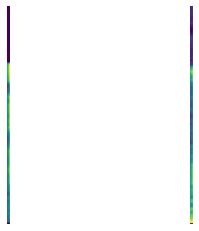

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-vi271kac\opencv\modules\dnn\src\layers\convolution_layer.cpp:386: error: (-2:Unspecified error) Number of input channels should be multiple of 3 but got 1 in function 'cv::dnn::ConvolutionLayerImpl::getMemoryShapes'


In [25]:
# AJ1=cv2.imread("AJ1.jpg")
# AJ2=cv2.imread("AJ2.jpg")
verify("md1.jpg", "md2.jpg", plot = True)